In [1]:
import sys
import os
sys.path.append(os.path.abspath("C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code"))
import hdf5storage
import mat73
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

import CURBD.curbd as curbd
import PyalData.pyaldata as pyaldata

In [2]:
data_dir_WTM350 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M350/WT-M350-pyaldata2" 
data_dir_WTM355 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M355/WT-M355-pyaldata2" 
data_dir_ASM351 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M351/AS-M351-pyaldata2" 
data_dir_ASM354 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M354/AS-M354-pyaldata2" 
data_dir_PSM365 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/PS-M365/PS-M365-pyaldata2" 
data_dir_PSM366 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/PS-M366/PS-M366-pyaldata2" 

In [3]:
files = os.listdir(data_dir_WTM355)
fpath = os.path.join(data_dir_WTM355, files[12])
df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
df["trial_id"] = range(len(df))
df = pyaldata.combine_time_bins(df, 5)
spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]
for col in spike_fields:
    df = pyaldata.remove_low_firing_neurons(df, col,  1)
for col in spike_fields:
    df = pyaldata.transform_signal(df, col,  'sqrt')
df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
df = pyaldata.add_firing_rates(df, 'smooth')
df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


In [4]:
concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
        


In [5]:
list_reset_points = []
for i in range(len(df)):
    list_reset_points.append(i*101)

list_reset_points

[0,
 101,
 202,
 303,
 404,
 505,
 606,
 707,
 808,
 909,
 1010,
 1111,
 1212,
 1313,
 1414,
 1515,
 1616,
 1717,
 1818]

(82, 1)
trial=0 pVar=0.468817 chi2=13.688925


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


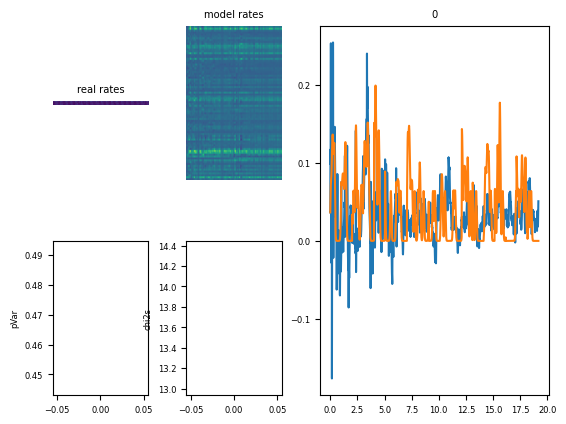

(82, 1)
trial=1 pVar=0.461694 chi2=14.191305
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=2 pVar=0.521567 chi2=12.574268


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=3 pVar=0.547294 chi2=11.868721


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=4 pVar=0.562146 chi2=11.487088


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=5 pVar=0.586515 chi2=10.899321


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=6 pVar=0.595052 chi2=10.619546
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=7 pVar=0.605009 chi2=10.345949
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=8 pVar=0.615638 chi2=10.071800


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=9 pVar=0.622989 chi2=9.886088
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=10 pVar=0.629767 chi2=9.715158


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=11 pVar=0.637262 chi2=9.519073
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=12 pVar=0.643979 chi2=9.337445


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=13 pVar=0.648929 chi2=9.200540


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=14 pVar=0.652667 chi2=9.096733
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=15 pVar=0.655700 chi2=9.013317


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=16 pVar=0.658258 chi2=8.943835
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=17 pVar=0.660430 chi2=8.885479


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=18 pVar=0.662260 chi2=8.836743


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=19 pVar=0.663796 chi2=8.796028
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=20 pVar=0.665104 chi2=8.761434


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=21 pVar=0.666237 chi2=8.731376
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=22 pVar=0.667228 chi2=8.704874


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=23 pVar=0.668097 chi2=8.681381
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=24 pVar=0.668857 chi2=8.660519
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=25 pVar=0.669524 chi2=8.641948


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=26 pVar=0.670111 chi2=8.625339


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=27 pVar=0.670633 chi2=8.610383


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=28 pVar=0.671101 chi2=8.596804
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=29 pVar=0.671527 chi2=8.584369


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=30 pVar=0.671918 chi2=8.572899


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=31 pVar=0.672280 chi2=8.562274


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=32 pVar=0.672615 chi2=8.552436


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=33 pVar=0.672925 chi2=8.543373


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=34 pVar=0.673209 chi2=8.535097


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=35 pVar=0.673468 chi2=8.527609


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=36 pVar=0.673701 chi2=8.520888


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=37 pVar=0.673912 chi2=8.514875


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=38 pVar=0.674103 chi2=8.509484


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=39 pVar=0.674277 chi2=8.504613
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=40 pVar=0.674440 chi2=8.500168


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=41 pVar=0.674594 chi2=8.496067
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=42 pVar=0.674740 chi2=8.492254


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=43 pVar=0.674881 chi2=8.488697


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=44 pVar=0.675015 chi2=8.485384


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=45 pVar=0.675145 chi2=8.482319


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=46 pVar=0.675267 chi2=8.479513


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=47 pVar=0.675383 chi2=8.476981


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=48 pVar=0.675491 chi2=8.474740
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=49 pVar=0.675591 chi2=8.472805
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=50 pVar=0.675681 chi2=8.471187


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=51 pVar=0.675761 chi2=8.469896


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=52 pVar=0.675831 chi2=8.468937


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=53 pVar=0.675889 chi2=8.468311
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=54 pVar=0.675937 chi2=8.468019


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=55 pVar=0.675973 chi2=8.468054
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=56 pVar=0.675999 chi2=8.468407
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=57 pVar=0.676013 chi2=8.469065


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=58 pVar=0.676017 chi2=8.470010


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=59 pVar=0.676011 chi2=8.471220


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=60 pVar=0.675996 chi2=8.472671


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=61 pVar=0.675973 chi2=8.474333
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=62 pVar=0.675943 chi2=8.476177


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=63 pVar=0.675906 chi2=8.478170


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=64 pVar=0.675865 chi2=8.480280
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=65 pVar=0.675820 chi2=8.482475


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=66 pVar=0.675772 chi2=8.484724
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=67 pVar=0.675723 chi2=8.486998
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=68 pVar=0.675673 chi2=8.489269


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=69 pVar=0.675624 chi2=8.491515
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=70 pVar=0.675576 chi2=8.493714
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=71 pVar=0.675529 chi2=8.495850


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=72 pVar=0.675484 chi2=8.497908


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=73 pVar=0.675443 chi2=8.499877


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=74 pVar=0.675404 chi2=8.501748


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=75 pVar=0.675369 chi2=8.503516
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=76 pVar=0.675337 chi2=8.505177
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=77 pVar=0.675308 chi2=8.506729
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=78 pVar=0.675283 chi2=8.508173
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=79 pVar=0.675261 chi2=8.509510


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=80 pVar=0.675242 chi2=8.510742
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=81 pVar=0.675227 chi2=8.511873
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=82 pVar=0.675215 chi2=8.512906


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=83 pVar=0.675205 chi2=8.513845
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=84 pVar=0.675199 chi2=8.514696


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=85 pVar=0.675194 chi2=8.515463
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=86 pVar=0.675193 chi2=8.516151
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=87 pVar=0.675193 chi2=8.516764


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=88 pVar=0.675195 chi2=8.517308


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=89 pVar=0.675199 chi2=8.517787


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=90 pVar=0.675205 chi2=8.518205


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=91 pVar=0.675212 chi2=8.518567
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=92 pVar=0.675221 chi2=8.518877
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=93 pVar=0.675230 chi2=8.519139
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=94 pVar=0.675241 chi2=8.519355
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=95 pVar=0.675253 chi2=8.519530


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=96 pVar=0.675265 chi2=8.519667


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=97 pVar=0.675279 chi2=8.519769


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=98 pVar=0.675293 chi2=8.519837


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=99 pVar=0.675307 chi2=8.519876
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=100 pVar=0.675322 chi2=8.519886


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=101 pVar=0.675338 chi2=8.519870
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=102 pVar=0.675353 chi2=8.519831
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=103 pVar=0.675369 chi2=8.519769


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=104 pVar=0.675386 chi2=8.519686


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=105 pVar=0.675402 chi2=8.519585


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=106 pVar=0.675419 chi2=8.519465


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=107 pVar=0.675436 chi2=8.519329


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=108 pVar=0.675453 chi2=8.519178


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=109 pVar=0.675470 chi2=8.519014


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=110 pVar=0.675487 chi2=8.518837


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=111 pVar=0.675504 chi2=8.518649


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=112 pVar=0.675521 chi2=8.518452


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=113 pVar=0.675538 chi2=8.518247


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=114 pVar=0.675555 chi2=8.518036


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=115 pVar=0.675572 chi2=8.517823


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=116 pVar=0.675588 chi2=8.517608


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=117 pVar=0.675604 chi2=8.517397
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=118 pVar=0.675619 chi2=8.517192
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=119 pVar=0.675634 chi2=8.517000


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=120 pVar=0.675647 chi2=8.516827
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=121 pVar=0.675660 chi2=8.516684


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=122 pVar=0.675670 chi2=8.516584
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=123 pVar=0.675678 chi2=8.516547
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=124 pVar=0.675682 chi2=8.516607


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=125 pVar=0.675679 chi2=8.516818


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=126 pVar=0.675667 chi2=8.517285


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=127 pVar=0.675637 chi2=8.518232


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=128 pVar=0.675563 chi2=8.520282
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=129 pVar=0.675341 chi2=8.526187
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=130 pVar=-51.948549 chi2=1395.294012
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=131 pVar=-72.341647 chi2=1932.603227
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=132 pVar=-72.532277 chi2=1937.607817


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=133 pVar=-72.593856 chi2=1939.264421
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=134 pVar=-72.618008 chi2=1939.889037
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=135 pVar=-72.655633 chi2=1940.886955
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=136 pVar=-72.666163 chi2=1941.158371
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=137 pVar=-72.673331 chi2=1941.358159


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=138 pVar=-72.672689 chi2=1941.341795
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=139 pVar=-72.663600 chi2=1941.103774


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=140 pVar=-72.660346 chi2=1941.016574
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=141 pVar=-72.684413 chi2=1941.655993
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=142 pVar=-72.688376 chi2=1941.760342
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=143 pVar=-72.691142 chi2=1941.823914


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=144 pVar=-72.699643 chi2=1942.054057
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=145 pVar=-72.704110 chi2=1942.171679
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=146 pVar=-72.708380 chi2=1942.284089
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=147 pVar=-72.711405 chi2=1942.376483


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=148 pVar=-72.718315 chi2=1942.333005


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=149 pVar=-72.719780 chi2=1942.371739
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=150 pVar=-72.713704 chi2=1942.211762


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=151 pVar=-72.710450 chi2=1942.126106
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=152 pVar=-72.712809 chi2=1942.189028
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=153 pVar=-72.728196 chi2=1942.594922


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=154 pVar=-72.733257 chi2=1942.728214
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=155 pVar=-72.736590 chi2=1942.815812


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=156 pVar=-72.738585 chi2=1942.868197


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=157 pVar=-72.739584 chi2=1942.894375
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=158 pVar=-72.740170 chi2=1942.909715
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=159 pVar=-72.740421 chi2=1942.916236


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=160 pVar=-72.740371 chi2=1942.914872
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=161 pVar=-72.739988 chi2=1942.904782
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=162 pVar=-72.739071 chi2=1942.880661
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=163 pVar=-72.737381 chi2=1942.836300
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=164 pVar=-72.733676 chi2=1942.737620


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=165 pVar=-72.731665 chi2=1942.684994
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=166 pVar=-72.730315 chi2=1942.649662
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=167 pVar=-72.729539 chi2=1942.629328
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=168 pVar=-72.729160 chi2=1942.619322
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=169 pVar=-72.729101 chi2=1942.617640


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=170 pVar=-72.729306 chi2=1942.622860
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=171 pVar=-72.729699 chi2=1942.632956
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=172 pVar=-72.730317 chi2=1942.648969
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=173 pVar=-72.730961 chi2=1942.665613
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=174 pVar=-72.731741 chi2=1942.685832
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=175 pVar=-72.719039 chi2=1942.352249


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=176 pVar=-72.733868 chi2=1942.742763
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=177 pVar=-72.734708 chi2=1942.764481
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=178 pVar=-72.735420 chi2=1942.782835
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=179 pVar=-72.735802 chi2=1942.792487
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=180 pVar=-72.735528 chi2=1942.784881


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=181 pVar=-72.735675 chi2=1942.788309
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=182 pVar=-72.734457 chi2=1942.754399
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=183 pVar=-72.734863 chi2=1942.764657


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=184 pVar=-72.735105 chi2=1942.770571
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=185 pVar=-72.735725 chi2=1942.786492


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=186 pVar=-72.735583 chi2=1942.782407
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=187 pVar=-72.735449 chi2=1942.778583
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=188 pVar=-72.735922 chi2=1942.790765
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=189 pVar=-72.738641 chi2=1942.862094
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=190 pVar=-72.738492 chi2=1942.858005


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=191 pVar=-72.739739 chi2=1942.890518
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=192 pVar=-72.740197 chi2=1942.902293
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=193 pVar=-72.739895 chi2=1942.894105
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=194 pVar=-72.737548 chi2=1942.834848
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=195 pVar=-72.734690 chi2=1942.758404
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=196 pVar=-72.734700 chi2=1942.759025


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=197 pVar=-72.737454 chi2=1942.828618
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=198 pVar=-72.736559 chi2=1942.804752


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=199 pVar=-72.735364 chi2=1942.772964
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=200 pVar=-72.734320 chi2=1942.745330


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [6]:
activity = np.transpose(concat_all_rates)  # transpose to get NxT (neurons x timesteps); input to the RNN is an array NxT of smoothed firing rates

Na = df.m1_rates[0].shape[1]
Nb = df.dcn_rates[0].shape[1]
Nc = df.str_rates[0].shape[1]

regions = []
regions.append(['m1', np.arange(0, Na)])  # region m1 and the array containing indexes of m1 units in activity; order matters so that the indexes matches the order m1, str, dcn, thal in activity
regions.append(['dcn', np.arange(Na, Na + Nb)])  # region str and the array containing indexes of str units in activity
regions.append(['str', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)

model = curbd.trainMultiRegionRNN(activity,
                                  dtData=df.bin_size[0],
                                  dtFactor=3,  # interpolation factor of RNN
                                  regions=regions,
                                  nRunTrain=200,
                                  verbose=True,
                                  plotStatus=True,
                                  nRunFree=1,
                                  resetPoints=list_reset_points)

In [ ]:
model

{'regions': array([['m1',
         array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
                68, 69, 70, 71, 72])                                               ],
        ['dcn',
         array([ 73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
                 86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
                 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
                112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
                125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
                138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
                151, 152, 153, 154, 155, 156, 157,

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

m1_activity = pca.fit_transform(np.transpose(model["Adata"][model["regions"][0,1],303:404]))
m1_activity = np.transpose(m1_activity)

m1_model = pca.fit_transform(np.transpose(model["RNN"][model["regions"][0,1],1515:2020]))
m1_model = np.transpose(m1_model)
plt.plot(m1_model[0], m1_model[1], "cornflowerblue", linestyle="--", linewidth=8)
plt.plot(m1_activity[0], m1_activity[1], "orange", linewidth=8)
#plt.legend(["Model RNN","Experimental Data"], fontsize=20)

ValueError: Found array with 0 sample(s) (shape=(0, 38)) while a minimum of 1 is required by PCA.

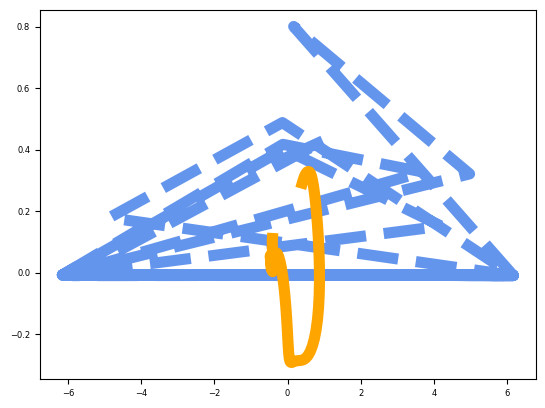

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

m1_activity = pca.fit_transform(np.transpose(model["Adata"][model["regions"][0,1],0:101]))
m1_activity = np.transpose(m1_activity)

m1_model = pca.fit_transform(np.transpose(model["RNN"][model["regions"][0,1],0:505]))
m1_model = np.transpose(m1_model)
plt.plot(m1_model[0], m1_model[1], "cornflowerblue", linestyle="--", linewidth=8)
plt.plot(m1_activity[0], m1_activity[1], "orange", linewidth=8)
#plt.legend(["Model RNN","Experimental Data"], fontsize=20)

In [ ]:
[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

In [ ]:
df_unbinned = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
df_unbinned = pyaldata.select_trials(df_unbinned, "success == 1")  # only consider successful trials
df_unbinned["trial_id"] = range(len(df_unbinned))
df_unbinned = pyaldata.restrict_to_interval(df_unbinned, "idx_mo", end_point_name=None, rel_start=-250, rel_end=250)  # consider half a second before and after movement onset
concat_all_vel = pyaldata.concat_trials(df_unbinned[0:5], 'vel')

In [ ]:
np.shape(concat_all_vel)

(2505,)

In [ ]:
np.shape(curbd_arr[0,0][:,0:2505])

(73, 2505)

In [ ]:
np.shape(df.vel)

(11,)

In [ ]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

m1_model = pca.fit_transform(np.transpose(model["RNN"][model["regions"][2,1],0:505]))
X_train, X_test, y_train, y_test = train_test_split((m1_model), np.transpose(concat_all_vel[0:505]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)
plt.plot(model['tRNN'][0:152],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:152],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())




ValueError: Found input variables with inconsistent numbers of samples: [501, 505]

78.222


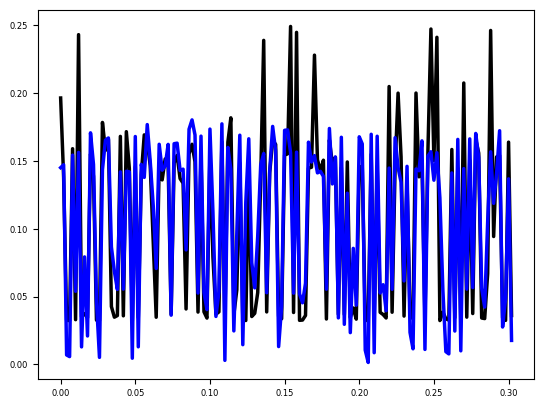

In [ ]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

current = pca.fit_transform(np.transpose(curbd_arr[2,1][:,0:505]))
X_train, X_test, y_train, y_test = train_test_split(current, np.transpose(concat_all_vel[0:505]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)
plt.plot(model['tRNN'][0:152],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:152],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())




In [ ]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

current_to_vel_regressors = {}

for 


current_to_vel_regressors
current = pca.fit_transform(np.transpose(curbd_arr[2,1][:,0:505]))
X_train, X_test, y_train, y_test = train_test_split(current, np.transpose(concat_all_vel[0:505]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

current_test = pca.fit_transform(np.transpose(curbd_arr[2,1][:,505:1010]))
vel_test = np.transpose(concat_all_vel[505:1010])
vel_predictions = regressor.predict(current_test)

plt.plot(model['tRNN'][0:505],np.transpose(vel_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:505],np.transpose(vel_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())

SyntaxError: invalid syntax (3897697663.py, line 6)

-117.50351


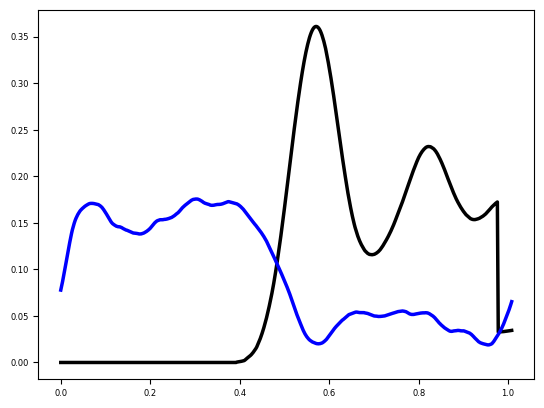

In [ ]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

pca = PCA(n_components = 2)

current = pca.fit_transform(np.transpose(curbd_arr[1,0][:,0:1515]))
X_train, X_test, y_train, y_test = train_test_split(current, np.transpose(concat_all_vel[0:1515]), test_size=0.1, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

current_test = pca.fit_transform(np.transpose(curbd_arr[1,0][:,1515:2020]))
vel_test = np.transpose(concat_all_vel[1515:2020])
vel_predictions = regressor.predict(current_test)

plt.plot(model['tRNN'][0:505],np.transpose(vel_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:505],np.transpose(vel_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(vel_test, vel_predictions, decimal=5)
print(evaluator.variance_accounted_for())

92.52687


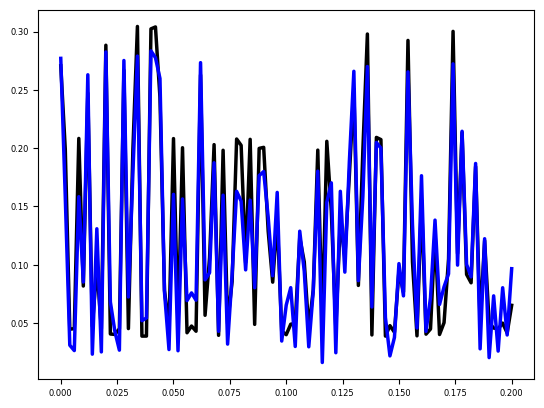

In [ ]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

pca = PCA(n_components = 2)

current = pca.fit_transform(np.transpose(curbd_arr[1,0][:,0:501]))
X_train, X_test, y_train, y_test = train_test_split(current, np.transpose(concat_all_vel[0:501]), test_size=0.2, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)

plt.plot(model['tRNN'][0:101],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:101],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())

In [ ]:
np.shape(current)

(505, 5)

In [ ]:
np.shape(curbd_arr[0,0])

(51, 2521)

In [ ]:
for i in range(np.shape(curbd_labels)[0]):
    for j in range(np.shape(curbd_labels)[1]):
        print(curbd_labels[i,j])

m1 to m1
dcn to m1
str to m1
m1 to dcn
dcn to dcn
str to dcn
m1 to str
dcn to str
str to str


In [ ]:
np.shape(curbd_labels)[0]

3

In [ ]:
curbd_labels

array([['m1 to m1', 'dcn to m1', 'str to m1'],
       ['m1 to dcn', 'dcn to dcn', 'str to dcn'],
       ['m1 to str', 'dcn to str', 'str to str']], dtype=object)

In [ ]:
np.shape(current)

(505, 2)

In [ ]:
np.shape(curbd_arr[0,0])

(51, 2521)

In [ ]:
model["regions"][0,0]

'm1'

65.49922


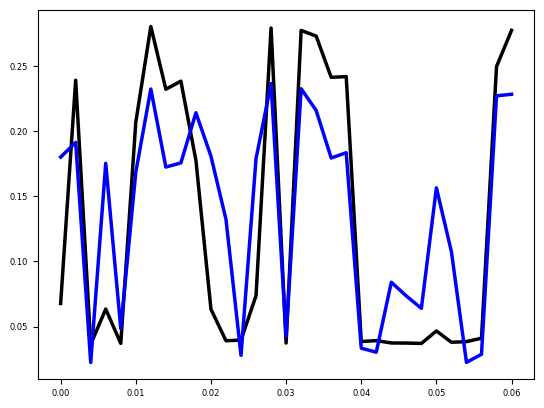

In [ ]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

X_train, X_test, y_train, y_test = train_test_split(np.transpose(m1_activity), np.transpose(concat_all_vel[0:505:5]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)
plt.plot(model['tRNN'][0:31],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:31],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())




In [ ]:
np.shape(m1_model)
np.shape(concat_all_vel[0:505])

(505,)

In [ ]:
np.shape(concat_all_vel[0:505:5])

(101,)

In [ ]:
concat_all_vel[0:505]

array([0.04161312, 0.04161328, 0.04158514, 0.04152951, 0.04148852,
       0.04139796, 0.0413308 , 0.04128988, 0.04120093, 0.04113792,
       0.04105419, 0.0409748 , 0.04088446, 0.04086409, 0.04083827,
       0.04073432, 0.04068216, 0.04059274, 0.0404877 , 0.04041391,
       0.04034185, 0.04021324, 0.04013571, 0.03998704, 0.03984668,
       0.03982934, 0.03978365, 0.03972032, 0.0396729 , 0.03948372,
       0.03941896, 0.03938441, 0.03940765, 0.03932647, 0.03927462,
       0.03922163, 0.0391575 , 0.0391598 , 0.03909987, 0.03906512,
       0.03901166, 0.0388238 , 0.03874048, 0.03870688, 0.03866377,
       0.03861407, 0.03855287, 0.03850546, 0.03845118, 0.03846688,
       0.03844781, 0.03842614, 0.0384033 , 0.03822308, 0.03816513,
       0.03813877, 0.03811143, 0.03809275, 0.03806127, 0.03800477,
       0.03796977, 0.03801386, 0.03796089, 0.03789016, 0.03786692,
       0.03780442, 0.03773894, 0.03770911, 0.03765774, 0.03760156,
       0.03754157, 0.03748855, 0.03741179, 0.03740844, 0.03735

In [ ]:
np.shape(X_train)

(70, 2)

In [ ]:
a = np.asarray(a)

In [ ]:
a[:,1]

array([2, 3])

In [ ]:
a[:,1,np.newaxis]

array([[2],
       [3]])

In [ ]:
np.shape(activity)

(200, 505)

In [ ]:
np.shape(concat_all_rates)

(505, 200)

In [ ]:
len(df)

16